**This notebook is an exercise in the [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/proximity-analysis).**

---


# Introduction 

You are part of a crisis response team, and you want to identify how hospitals have been responding to crash collisions in New York City.

<center>
<img src="https://i.imgur.com/wamd0n7.png" width="450"><br/>
</center>

Before you get started, run the code cell below to set everything up.

In [1]:
import math
import geopandas as gpd
import pandas as pd
from shapely.geometry import MultiPolygon

import folium
from folium import Choropleth, Marker, GeoJson
from folium.plugins import HeatMap, MarkerCluster

from learntools.core import binder
binder.bind(globals())
from learntools.geospatial.ex5 import *

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


You'll use the `embed_map()` function to visualize your maps.

In [22]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

# Exercises

### 1) Visualize the collision data.

Run the code cell below to load a GeoDataFrame `collisions` tracking major motor vehicle collisions in 2013-2018.

In [3]:
collisions = gpd.read_file("../input/geospatial-learn-course-data/NYPD_Motor_Vehicle_Collisions/NYPD_Motor_Vehicle_Collisions/NYPD_Motor_Vehicle_Collisions.shp")
collisions.head()

DATE   TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  07/30/2019   0:00      BRONX    10464  40.841100 -73.784960   
1  07/30/2019   0:10     QUEENS    11423  40.710827 -73.770660   
2  07/30/2019   0:25       None     None  40.880318 -73.841286   
3  07/30/2019   0:35  MANHATTAN    10036  40.756744 -73.984590   
4  07/30/2019  10:00   BROOKLYN    11223  40.600090 -73.965910   

                  LOCATION       ON STREET     CROSS STRE  \
0     (40.8411, -73.78496)            None           None   
1   (40.710827, -73.77066)  JAMAICA AVENUE     188 STREET   
2  (40.880318, -73.841286)     BOSTON ROAD           None   
3   (40.756744, -73.98459)            None           None   
4    (40.60009, -73.96591)        AVENUE T  OCEAN PARKWAY   

                 OFF STREET  ...   CONTRIBU_2  CONTRIBU_3  CONTRIBU_4  \
0    121       PILOT STREET  ...  Unspecified        None        None   
1                      None  ...         None        None        None   
2                      None  ...         None        None        None   
3  155       WEST 44 STREET  ...         None        None        None   
4                      None  ...         None        None        None   

   UNIQUE KEY                           VEHICLE TY  \
0     4180045                                Sedan   
1     4180007                                Sedan   
2     4179575                                Sedan   
3     4179544                            Box Truck   
4     4180660  Station Wagon/Sport Utility Vehicle   

                            VEHICLE _1                           VEHICLE _2  \
0  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
1                                Sedan                                 None   
2  Station Wagon/Sport Utility Vehicle                                 None   
3  Station Wagon/Sport Utility Vehicle                                 None   
4                                 Bike                                 None   

   VEHICLE _3 VEHICLE _4                        geometry  
0        None       None  POINT (1043750.211 245785.815)  
1        None       None  POINT (1047831.185 198333.171)  
2        None       None  POINT (1028139.293 260041.178)  
3        None       None   POINT (988519.261 214979.320)  
4        None       None   POINT (993716.669 157907.212)  

[5 rows x 30 columns]

In [4]:
collisions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 261905 entries, 0 to 261904
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   DATE        261905 non-null  object  
 1   TIME        261905 non-null  object  
 2   BOROUGH     199243 non-null  object  
 3   ZIP CODE    199200 non-null  object  
 4   LATITUDE    261905 non-null  float64 
 5   LONGITUDE   261905 non-null  float64 
 6   LOCATION    261905 non-null  object  
 7   ON STREET   225789 non-null  object  
 8   CROSS STRE  185029 non-null  object  
 9   OFF STREET  23998 non-null   object  
 10  NUMBER OF   261905 non-null  float64 
 11  NUMBER O_1  261892 non-null  float64 
 12  NUMBER O_2  261905 non-null  int64   
 13  NUMBER O_3  261905 non-null  int64   
 14  NUMBER O_4  261905 non-null  int64   
 15  NUMBER O_5  261905 non-null  int64   
 16  NUMBER O_6  261905 non-null  int64   
 17  NUMBER O_7  261905 non-null  int64   
 18  CONTRIBUTI  2601

Use the "LATITUDE" and "LONGITUDE" columns to create an interactive map to visualize the collision data.  What type of map do you think is most effective?

In [5]:
m_1 = folium.Map(location=[40.7, -74], zoom_start=11) 

# Your code here: Visualize the collision data
HeatMap(data=collisions[['LATITUDE', 'LONGITUDE']], radius=10).add_to(m_1)
# Uncomment to see a hint
#q_1.hint()

# Show the map
embed_map(m_1, "q_1.html")

In [6]:
# Get credit for your work after you have created a map
q_1.check()

# Uncomment to see our solution (your code may look different!)
#q_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

### 2) Understand hospital coverage.

Run the next code cell to load the hospital data.

In [7]:
hospitals = gpd.read_file("../input/geospatial-learn-course-data/nyu_2451_34494/nyu_2451_34494/nyu_2451_34494.shp")
hospitals.head()

id                                               name  \
0  317000001H1178  BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...   
1  317000001H1164    BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION   
2  317000011H1175                               CALVARY HOSPITAL INC   
3  317000002H1165                              JACOBI MEDICAL CENTER   
4  317000008H1172             LINCOLN MEDICAL & MENTAL HEALTH CENTER   

                  address    zip factype   facname capacity capname  bcode  \
0    1650 Grand Concourse  10457    3102  Hospital      415    Beds  36005   
1         1276 Fulton Ave  10456    3102  Hospital      164    Beds  36005   
2  1740-70 Eastchester Rd  10461    3102  Hospital      225    Beds  36005   
3        1400 Pelham Pkwy  10461    3102  Hospital      457    Beds  36005   
4            234 E 149 St  10451    3102  Hospital      362    Beds  36005   

      xcoord    ycoord   latitude  longitude                        geometry  
0  1008872.0  246596.0  40.843490 -73.911010  POINT (1008872.000 246596.000)  
1  1011044.0  242204.0  40.831429 -73.903178  POINT (1011044.000 242204.000)  
2  1027505.0  248287.0  40.848060 -73.843656  POINT (1027505.000 248287.000)  
3  1027042.0  251065.0  40.855687 -73.845311  POINT (1027042.000 251065.000)  
4  1005154.0  236853.0  40.816758 -73.924478  POINT (1005154.000 236853.000)

Use the "latitude" and "longitude" columns to visualize the hospital locations. 

In [8]:
m_2 = folium.Map(location=[40.7, -74], zoom_start=11) 

# Your code here: Visualize the hospital locations
for idx, row in hospitals.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)

# Uncomment to see a hint
#q_2.hint()
        
# Show the map
embed_map(m_2, "q_2.html")

In [9]:
# Get credit for your work after you have created a map
q_2.check()

# Uncomment to see our solution (your code may look different!)
#q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

### 3) When was the closest hospital more than 10 kilometers away?

Create a DataFrame `outside_range` containing all rows from `collisions` with crashes that occurred more than 10 kilometers from the closest hospital.

Note that both `hospitals` and `collisions` have EPSG 2263 as the coordinate reference system, and EPSG 2263 has units of meters.

In [10]:
# Your code here
m_3 = folium.Map(location=[40.6,-74], zoom_start=9)
HeatMap(data=collisions[['LATITUDE', 'LONGITUDE']], radius=15).add_to(m_3)
for idx, row in hospitals.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_3)
ten_kilometer_range = hospitals.geometry.buffer(10000)
GeoJson(ten_kilometer_range.to_crs(epsg=2263)).add_to(m_3)
m_3 
# outside_range = ____

# Check your answer
# q_3.check()

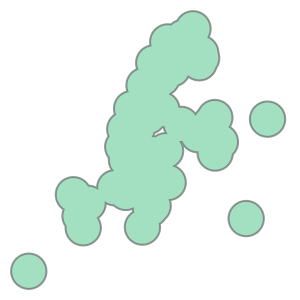

In [24]:
my_union = ten_kilometer_range.geometry.unary_union

my_union

In [25]:
outside_range = collisions.loc[~collisions["geometry"].apply(lambda x: my_union.contains(x))]
outside_range.head()
# Check your answer
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [12]:
outside_range.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 39595 entries, 0 to 261900
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DATE        39595 non-null  object  
 1   TIME        39595 non-null  object  
 2   BOROUGH     25898 non-null  object  
 3   ZIP CODE    25891 non-null  object  
 4   LATITUDE    39595 non-null  float64 
 5   LONGITUDE   39595 non-null  float64 
 6   LOCATION    39595 non-null  object  
 7   ON STREET   33001 non-null  object  
 8   CROSS STRE  25642 non-null  object  
 9   OFF STREET  2936 non-null   object  
 10  NUMBER OF   39595 non-null  float64 
 11  NUMBER O_1  39593 non-null  float64 
 12  NUMBER O_2  39595 non-null  int64   
 13  NUMBER O_3  39595 non-null  int64   
 14  NUMBER O_4  39595 non-null  int64   
 15  NUMBER O_5  39595 non-null  int64   
 16  NUMBER O_6  39595 non-null  int64   
 17  NUMBER O_7  39595 non-null  int64   
 18  CONTRIBUTI  39427 non-null  object  


In [13]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

The next code cell calculates the percentage of collisions that occurred more than 10 kilometers away from the closest hospital.

In [14]:
percentage = round(100*len(outside_range)/len(collisions), 2)
print("Percentage of collisions more than 10 km away from the closest hospital: {}%".format(percentage))

Percentage of collisions more than 10 km away from the closest hospital: 15.12%


### 4) Make a recommender.

When collisions occur in distant locations, it becomes even more vital that injured persons are transported to the nearest available hospital.

With this in mind, you decide to create a recommender that:
- takes the location of the crash (in EPSG 2263) as input,
- finds the closest hospital (where distance calculations are done in EPSG 2263), and 
- returns the name of the closest hospital. 

In [15]:
def best_hospital(collision_location):
    # Your code here
    distances = hospitals.geometry.distance(collision_location)
    name = hospitals.iloc[distances.idxmin()]['name']
    return name

# Test your function: this should suggest CALVARY HOSPITAL INC
print(best_hospital(outside_range.geometry.iloc[0]))

# Check your answer
q_4.check()

CALVARY HOSPITAL INC


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [16]:
# Lines below will give you a hint or solution code
#q_4.hint()
#q_4.solution()

### 5) Which hospital is under the highest demand?

Considering only collisions in the `outside_range` DataFrame, which hospital is most recommended?  

Your answer should be a Python string that exactly matches the name of the hospital returned by the function you created in **4)**.

In [17]:
# Your code here
highest_demand = outside_range.geometry.apply(best_hospital).value_counts().idxmax()
print(highest_demand)
# Check your answer
q_5.check()

JAMAICA HOSPITAL MEDICAL CENTER


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [18]:
# Lines below will give you a hint or solution code
# q_5.hint()
# q_5.solution()

### 6) Where should the city construct new hospitals?

Run the next code cell (without changes) to visualize hospital locations, in addition to collisions that occurred more than 10 kilometers away from the closest hospital. 

In [29]:
m_6 = folium.Map(location=[40.7, -74], zoom_start=11) 

coverage = gpd.GeoDataFrame(geometry=hospitals.geometry).buffer(10000)
folium.GeoJson(coverage.geometry.to_crs(epsg=4326)).add_to(m_6)
HeatMap(data=outside_range[['LATITUDE', 'LONGITUDE']], radius=9).add_to(m_6)
folium.LatLngPopup().add_to(m_6)

embed_map(m_6, 'm_6.html')

Click anywhere on the map to see a pop-up with the corresponding location in latitude and longitude.

The city of New York reaches out to you for help with deciding locations for two brand new hospitals.  They specifically want your help with identifying locations to bring the calculated percentage from step **3)** to less than ten percent.  Using the map (and without worrying about zoning laws or what potential buildings would have to be removed in order to build the hospitals), can you identify two locations that would help the city accomplish this goal?  

Put the proposed latitude and longitude for hospital 1 in `lat_1` and `long_1`, respectively.  (Likewise for hospital 2.)

Then, run the rest of the cell as-is to see the effect of the new hospitals.  Your answer will be marked correct, if the two new hospitals bring the percentage to less than ten percent.

In [30]:
# Your answer here: proposed location of hospital 1
lat_1 = 40.6661
long_1 = -73.7445

# Your answer here: proposed location of hospital 2
lat_2 =  40.6702
long_2 = -73.8695


# Do not modify the code below this line
try:
    new_df = pd.DataFrame(
        {'Latitude': [lat_1, lat_2],
         'Longitude': [long_1, long_2]})
    new_gdf = gpd.GeoDataFrame(new_df, geometry=gpd.points_from_xy(new_df.Longitude, new_df.Latitude))
    new_gdf.crs = {'init' :'epsg:4326'}
    new_gdf = new_gdf.to_crs(epsg=2263)
    # get new percentage
    new_coverage = gpd.GeoDataFrame(geometry=new_gdf.geometry).buffer(10000)
    new_my_union = new_coverage.geometry.unary_union
    new_outside_range = outside_range.loc[~outside_range["geometry"].apply(lambda x: new_my_union.contains(x))]
    new_percentage = round(100*len(new_outside_range)/len(collisions), 2)
    print("(NEW) Percentage of collisions more than 10 km away from the closest hospital: {}%".format(new_percentage))
    # Did you help the city to meet its goal?
    q_6.check()
    # make the map
    m = folium.Map(location=[40.7, -74], zoom_start=11) 
    folium.GeoJson(coverage.geometry.to_crs(epsg=4326)).add_to(m)
    folium.GeoJson(new_coverage.geometry.to_crs(epsg=4326)).add_to(m)
    for idx, row in new_gdf.iterrows():
        Marker([row['Latitude'], row['Longitude']]).add_to(m)
    HeatMap(data=new_outside_range[['LATITUDE', 'LONGITUDE']], radius=9).add_to(m)
    folium.LatLngPopup().add_to(m)
    display(embed_map(m, 'q_6.html'))
except:
    q_6.hint()

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(NEW) Percentage of collisions more than 10 km away from the closest hospital: 9.8%


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

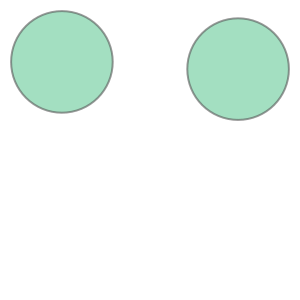

In [32]:
new_my_union

In [21]:
# Uncomment to see one potential answer 
#q_6.solution()

# Congratulations!

You have just completed the Geospatial Analysis micro-course!  Great job!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*